## Corrupted data evaluation (based on rerank.py)

In [1]:
import pandas as pd
import os
import ir_measures
from ir_measures import read_trec_run, calc_aggregate, nDCG, R, RR, P
from neural_ir.dataset import PairDataset

# create dataset object for evaluating the queries
dev_dataset = PairDataset(
    collection_path="data/collection.tsv",
    queries_path="data/dev_queries.tsv",
    query_doc_pair_path="data/dev_bm25.trec",
    qrels_path="data/dev_qrels.json",
)

qrels = dev_dataset.qrels

In [2]:
trec_files = {
    "ce baseline": "output/all_metrics_rank/ce/test_run.trec",
    "ce contractions": "output/all_metrics_rank/ce/contractions_test_run.trec",
    "ce merged": "output/all_metrics_rank/ce/merged_test_run.trec",
    "ce merged typos": "output/all_metrics_rank/ce/merged_typos_test_run.trec",
    "ce typos": "output/all_metrics_rank/ce/typos_test_run.trec",
    "dense baseline": "output/all_metrics_rank/dense/test_run.trec",
    "dense contractions": "output/all_metrics_rank/dense/contractions_test_run.trec",
    "dense merged": "output/all_metrics_rank/dense/merged_test_run.trec",
    "dense merged typos": "output/all_metrics_rank/dense/merged_typos_test_run.trec",
    "dense typos": "output/all_metrics_rank/dense/typos_test_run.trec",
    "sparse baseline": "output/all_metrics_rank/sparse/test_run.trec",
    "sparse contractions": "output/all_metrics_rank/sparse/contractions_test_run.trec",
    "sparse merged": "output/all_metrics_rank/sparse/merged_test_run.trec",
    "sparse merged typos": "output/all_metrics_rank/sparse/merged_typos_test_run.trec",
    "sparse typos": "output/all_metrics_rank/sparse/typos_test_run.trec",
}

df_results = pd.DataFrame()

for name, trec_file in trec_files.items():
    if os.path.exists(trec_file):
        run = read_trec_run(trec_file)
        metrics = calc_aggregate(
            [
                nDCG @ 10,
                # nDCG @ 100,
                R @ 10,
                # R @ 100,
                P @ 10,
                # P @ 100,
                RR @ 10,
                # RR @ 100,
            ],
            qrels,
            run,
        )
        metrics = {str(k): v for k, v in metrics.items()}
        df_results = pd.concat(
            [
                df_results,
                pd.DataFrame(
                    [
                        {
                            "Run": name,
                            "nDCG@10": metrics["nDCG@10"],
                            # "nDCG@100": metrics["nDCG@100"],
                            "R@10": metrics["R@10"],
                            # "R@100": metrics["R@100"],
                            "P@10": metrics["P@10"],
                            # "P@100": metrics["P@100"],
                            "RR@10": metrics["RR@10"],
                            # "RR@100": metrics["RR@100"],
                        }
                    ]
                ),
            ],
            ignore_index=True,
        )
    else:
        print(f"{trec_file} not found!")

# df_results.to_csv("output/metrics_results.csv", index=False)
df_results

,Run,nDCG@10,R@10,P@10,RR@10
0,ce baseline,0.762588,0.856667,0.0935,0.739109
1,ce contractions,0.758080,0.851667,0.0930,0.734887
2,ce merged,0.573227,0.667500,0.0715,0.549760
3,ce merged typos,0.265848,0.339167,0.0365,0.246101
4,ce typos,0.444629,0.524167,0.0580,0.421387
5,dense baseline,0.738887,0.845000,0.0905,0.718748
6,dense contractions,0.732626,0.835000,0.0895,0.713137
7,dense merged,0.519339,0.646667,0.0690,0.488700
8,dense merged typos,0.310117,0.431667,0.0450,0.276937
9,dense typos,0.462827,0.576667,0.0605,0.438623


In [4]:
print(df_results.to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
Run & nDCG@10 & R@10 & P@10 & RR@10 \\
\midrule
ce baseline & 0.762588 & 0.856667 & 0.093500 & 0.739109 \\
ce contractions & 0.758080 & 0.851667 & 0.093000 & 0.734887 \\
ce merged & 0.573227 & 0.667500 & 0.071500 & 0.549760 \\
ce merged typos & 0.265848 & 0.339167 & 0.036500 & 0.246101 \\
ce typos & 0.444629 & 0.524167 & 0.058000 & 0.421387 \\
dense baseline & 0.738887 & 0.845000 & 0.090500 & 0.718748 \\
dense contractions & 0.732626 & 0.835000 & 0.089500 & 0.713137 \\
dense merged & 0.519339 & 0.646667 & 0.069000 & 0.488700 \\
dense merged typos & 0.310117 & 0.431667 & 0.045000 & 0.276937 \\
dense typos & 0.462827 & 0.576667 & 0.060500 & 0.438623 \\
sparse baseline & 0.618606 & 0.739167 & 0.078500 & 0.588804 \\
sparse contractions & 0.615398 & 0.734167 & 0.078000 & 0.586387 \\
sparse merged & 0.448651 & 0.566667 & 0.061000 & 0.420274 \\
sparse merged typos & 0.274523 & 0.376667 & 0.039500 & 0.246343 \\
sparse typos & 0.387382 & 0.480833 & 0.050500 & 0.3

In [5]:
column_names_rename = {
    "Run": "Run",
    "nDCG@10": "nDCG@10 change",
    "R@10": "R@10 change",
    "P@10": "P@10 change",
    "RR@10": "RR@10 change",
}
df_results_splitted = {}
model_prefixes = ["ce", "dense", "sparse"]

# Split data by model prefix
for model_prefix in model_prefixes:
    model_results = df_results[df_results["Run"].str.startswith(model_prefix)]
    df_results_splitted[model_prefix] = model_results.set_index("Run")

# Compute the percentage change in metrics with respect to the baseline
df_changes_percent = {}

for model_prefix, df in df_results_splitted.items():
    baseline_metrics = df.loc[f"{model_prefix} baseline"]
    df_changes_percent[model_prefix] = (df - baseline_metrics) / baseline_metrics * 100
    df_changes_percent[model_prefix].rename(columns=column_names_rename, inplace=True)
    # remove index
    df_changes_percent[model_prefix].reset_index(inplace=True)


for key, df in df_changes_percent.items():
    print(f"Model: {key}")
    display(df)
    print(df.to_latex())
    print("\n")

Model: ce


,Run,nDCG@10 change,R@10 change,P@10 change,RR@10 change
0,ce baseline,0.000000,0.000000,0.000000,0.000000
1,ce contractions,-0.591145,-0.583658,-0.534759,-0.571258
2,ce merged,-24.831460,-22.081712,-23.529412,-25.618572
3,ce merged typos,-65.138752,-60.408560,-60.962567,-66.702997
4,ce typos,-41.694710,-38.813230,-37.967914,-42.987187


\begin{tabular}{llrrrr}
\toprule
 & Run & nDCG@10 change & R@10 change & P@10 change & RR@10 change \\
\midrule
0 & ce baseline & 0.000000 & 0.000000 & 0.000000 & 0.000000 \\
1 & ce contractions & -0.591145 & -0.583658 & -0.534759 & -0.571258 \\
2 & ce merged & -24.831460 & -22.081712 & -23.529412 & -25.618572 \\
3 & ce merged typos & -65.138752 & -60.408560 & -60.962567 & -66.702997 \\
4 & ce typos & -41.694710 & -38.813230 & -37.967914 & -42.987187 \\
\bottomrule
\end{tabular}



Model: dense


,Run,nDCG@10 change,R@10 change,P@10 change,RR@10 change
0,dense baseline,0.000000,0.000000,0.000000,0.000000
1,dense contractions,-0.847325,-1.183432,-1.104972,-0.780678
2,dense merged,-29.713364,-23.471400,-23.756906,-32.006714
3,dense merged typos,-58.029212,-48.915187,-50.276243,-61.469597
4,dense typos,-37.361522,-31.755424,-33.149171,-38.974021


\begin{tabular}{llrrrr}
\toprule
 & Run & nDCG@10 change & R@10 change & P@10 change & RR@10 change \\
\midrule
0 & dense baseline & 0.000000 & 0.000000 & 0.000000 & 0.000000 \\
1 & dense contractions & -0.847325 & -1.183432 & -1.104972 & -0.780678 \\
2 & dense merged & -29.713364 & -23.471400 & -23.756906 & -32.006714 \\
3 & dense merged typos & -58.029212 & -48.915187 & -50.276243 & -61.469597 \\
4 & dense typos & -37.361522 & -31.755424 & -33.149171 & -38.974021 \\
\bottomrule
\end{tabular}



Model: sparse


,Run,nDCG@10 change,R@10 change,P@10 change,RR@10 change
0,sparse baseline,0.000000,0.000000,0.000000,0.000000
1,sparse contractions,-0.518595,-0.676437,-0.636943,-0.410437
2,sparse merged,-27.473841,-23.337091,-22.292994,-28.622408
3,sparse merged typos,-55.622260,-49.041714,-49.681529,-58.162065
4,sparse typos,-37.378287,-34.949267,-35.668790,-38.267674


\begin{tabular}{llrrrr}
\toprule
 & Run & nDCG@10 change & R@10 change & P@10 change & RR@10 change \\
\midrule
0 & sparse baseline & 0.000000 & 0.000000 & 0.000000 & 0.000000 \\
1 & sparse contractions & -0.518595 & -0.676437 & -0.636943 & -0.410437 \\
2 & sparse merged & -27.473841 & -23.337091 & -22.292994 & -28.622408 \\
3 & sparse merged typos & -55.622260 & -49.041714 & -49.681529 & -58.162065 \\
4 & sparse typos & -37.378287 & -34.949267 & -35.668790 & -38.267674 \\
\bottomrule
\end{tabular}





PLOTTING THE RESULTS

In [ ]:
df_results["Run"] = df_results["Run"].astype(str) 

df_ce = df_results[df_results["Run"].str.startswith("ce")]
df_dense = df_results[df_results["Run"].str.startswith("dense")]
df_sparse = df_results[df_results["Run"].str.startswith("sparse")]


/var/folders/rb/c3x2w_0x2s722qkknt3trrxm0000gn/T/ipykernel_55579/2107676170.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_subset["Run"], rotation=45, ha="right")
/var/folders/rb/c3x2w_0x2s722qkknt3trrxm0000gn/T/ipykernel_55579/2107676170.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_subset["Run"], rotation=45, ha="right")
/var/folders/rb/c3x2w_0x2s722qkknt3trrxm0000gn/T/ipykernel_55579/2107676170.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_subset["Run"], rotation=45, ha="right")


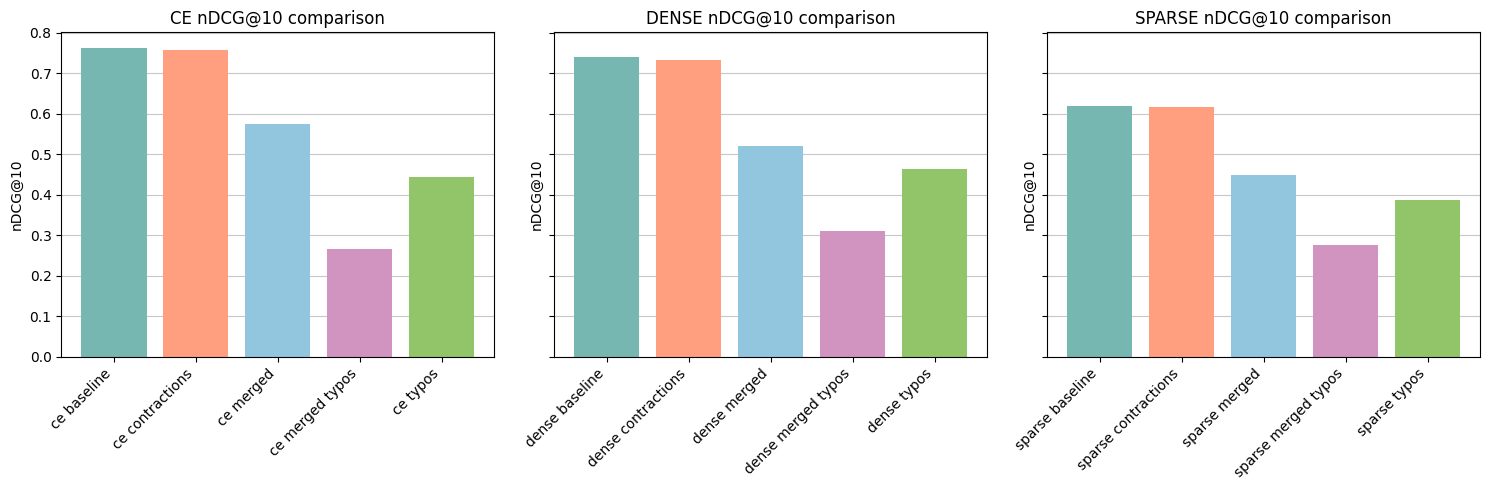

In [15]:
import matplotlib.pyplot as plt

colors = ["#76b7b2", "#ff9f80", "#92c5de", "#d194c1", "#92c569"]
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

titles = ["CE", "DENSE", "SPARSE"]

df_splits = [df_ce, df_dense, df_sparse]
for ax, df_subset, title in zip(axes, df_splits, titles):
    ax.bar(df_subset["Run"], df_subset["nDCG@10"], color=colors)
    ax.set_title(f"{title} nDCG@10 comparison")
    ax.set_ylabel("nDCG@10")
    ax.set_xticklabels(df_subset["Run"], rotation=45, ha="right")
    ax.yaxis.grid(True, linestyle="-", alpha=0.7, zorder=0)
    ax.set_axisbelow(True) 


plt.tight_layout()
plt.show()

### <span style="color:red">[OLD]</span> Corrupted data evaluation (based on evaluation.py)

In [4]:
import json
import pandas as pd

ORIGINAL_DATA_DIR = "output/all_metrics/original_data"
CORRUPTED_DATA_DIR = "output/all_metrics/corrupted_data"

MODELS = ["ce", "dense", "sparse"]
CORRUPTIONS = ["contractions", "merged", "merged_typos", "typos"]

In [5]:
retain_columns = ["model", "corruption", "eval_nDCG@10", "eval_R@1000", "eval_RR@10"]
original_results = []

# evaluate original data
for model in MODELS:
    with open(f"{ORIGINAL_DATA_DIR}/{model}/model/metrics.json", "r") as f:
        metrics = json.load(f)
        metrics["model"] = model
        metrics["corruption"] = None
        original_results.append(metrics)

In [6]:
corrupted_results = []
for model in MODELS:
    for corr in CORRUPTIONS:
        # read the json file
        with open(f"{CORRUPTED_DATA_DIR}/{corr}/{model}/model/metrics.json", "r") as f:
            # create a dictionary from the json file
            corrupted_metrics = json.load(f)
            corrupted_metrics["model"] = model
            corrupted_metrics["corruption"] = corr
            corrupted_results.append(corrupted_metrics)

In [7]:
original_results_df = pd.DataFrame(original_results)
corrupted_results_df = pd.DataFrame(corrupted_results)

display(original_results_df)
display(corrupted_results_df)

,eval_nDCG@10,eval_R@1000,eval_RR@10,epoch,model,corruption
0,0.764315,0.9825,0.740222,None,ce,None
1,0.765611,0.9825,0.743575,None,dense,None
2,0.017623,0.9825,0.014125,None,sparse,None


,eval_nDCG@10,eval_R@1000,eval_RR@10,epoch,model,corruption
0,0.756981,0.9825,0.735917,None,ce,contractions
1,0.513789,0.9825,0.483262,None,ce,merged
2,0.203414,0.9825,0.192048,None,ce,merged_typos
3,0.357106,0.9825,0.335569,None,ce,typos
4,0.760579,0.9825,0.739456,None,dense,contractions
5,0.581472,0.9825,0.554450,None,dense,merged
6,0.442755,0.9825,0.411544,None,dense,merged_typos
7,0.564513,0.9825,0.537587,None,dense,typos
8,0.017623,0.9825,0.014125,None,sparse,contractions
9,0.008601,0.9825,0.006714,None,sparse,merged


In [8]:
# merge the results
all_results = original_results + corrupted_results

results_df = pd.DataFrame.from_dict(all_results)
results_df = results_df[retain_columns].sort_values(by=["model"])
results_df

,model,corruption,eval_nDCG@10,eval_R@1000,eval_RR@10
0,ce,None,0.764315,0.9825,0.740222
3,ce,contractions,0.756981,0.9825,0.735917
4,ce,merged,0.513789,0.9825,0.483262
5,ce,merged_typos,0.203414,0.9825,0.192048
6,ce,typos,0.357106,0.9825,0.335569
1,dense,None,0.765611,0.9825,0.743575
7,dense,contractions,0.760579,0.9825,0.739456
8,dense,merged,0.581472,0.9825,0.554450
9,dense,merged_typos,0.442755,0.9825,0.411544
10,dense,typos,0.564513,0.9825,0.537587


In [9]:
# convert results_df to latex table
print(results_df.to_latex(index=False))

\begin{tabular}{llrrr}
\toprule
model & corruption & eval_nDCG@10 & eval_R@1000 & eval_RR@10 \\
\midrule
ce & NaN & 0.764315 & 0.982500 & 0.740222 \\
ce & contractions & 0.756981 & 0.982500 & 0.735917 \\
ce & merged & 0.513789 & 0.982500 & 0.483262 \\
ce & merged_typos & 0.203414 & 0.982500 & 0.192048 \\
ce & typos & 0.357106 & 0.982500 & 0.335569 \\
dense & NaN & 0.765611 & 0.982500 & 0.743575 \\
dense & contractions & 0.760579 & 0.982500 & 0.739456 \\
dense & merged & 0.581472 & 0.982500 & 0.554450 \\
dense & merged_typos & 0.442755 & 0.982500 & 0.411544 \\
dense & typos & 0.564513 & 0.982500 & 0.537587 \\
sparse & NaN & 0.017623 & 0.982500 & 0.014125 \\
sparse & contractions & 0.017623 & 0.982500 & 0.014125 \\
sparse & merged & 0.008601 & 0.982500 & 0.006714 \\
sparse & merged_typos & 0.006101 & 0.982500 & 0.003381 \\
sparse & typos & 0.004434 & 0.982500 & 0.002667 \\
\bottomrule
\end{tabular}



In [10]:
# settings
# ce 2000 64 batch
# dense  2000 64 batch
# sparse 1000 32 batch

# NOTE
# - the evaluation metrics do not have to be from the same model that passes the tests, we can choose the one that performs best on the dev query set
# - modifications for the models should be applied to various architectures individually, contrary to what they're saying in the assignment
# - the choice of metrics is arbitrary, we just have to justify it